<a href="https://colab.research.google.com/github/CarlaFFochs/Nuclio_DataScience_Projects/blob/main/Clase1_IMDB_Limpieza_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## CLASE 1: EDA + Data Cleaning

**NOTA: M'he equivocat desde el principi en asignar la variable, he posat "imbd" en comptes de imdb --> siglas "Internet Movie Database"**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
imbd= pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/M3 - LIMPIEZA DE DATOS/Clase 1 - Limpieza datos/datasets/IMDB.csv", sep=";", index_col= [0])

#hem de posar el sep perquè entengui el document
#tambe amb el index_col= [0], hem fet que la primera columna no tingui el identificador 0,1,2... sino estava repetit. Quan posem el index_col[0] estem dient que la primera columna es el index.
#si sale un error de token, es porque no esta leyendo el archivo bien, seguramente por los separadores

In [4]:
imbd

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [5]:
#un cop hem llegit el dataset es veure la informació del data set
imbd.info()

#hay 3 columnas y dentro de cada una nos indica las filas
#el "Object" es como un string
#nos damos cuenta que no hay 97 filas para todos


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 86 non-null     object 
 1   director_name         86 non-null     object 
 2   duration              97 non-null     int64  
 3   gross                 89 non-null     float64
 4   genres                96 non-null     object 
 5   movie_title           97 non-null     object 
 6   title_year            97 non-null     int64  
 7   language              97 non-null     object 
 8   country               97 non-null     object 
 9   budget                93 non-null     float64
 10  imdb_score            97 non-null     float64
 11  actors                97 non-null     object 
 12  movie_facebook_likes  97 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.6+ KB


In [6]:
imbd.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [7]:
imbd.tail()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000
96,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [8]:
imbd[(imbd['duration']>134) & (imbd["imdb_score"]>8)] # tambe ho podem fer imbd[(imbd.duration> 134) & (imbd.imdb_score >8)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
12,Color,Christopher Nolan,169,187991439.0,Adventure|Drama|Sci-Fi,Interstellar,2014,English,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000
15,Color,Quentin Tarantino,580,162804648.0,Drama|Western,Django Unchained,2012,English,USA,100000000.0,8.5,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
17,NaN,Christopher Nolan,164,448130642.0,Action|Thriller,The Dark Knight Rises,2012,English,USA,250000000.0,8.5,"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",164000
23,Color,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
25,Color,Denis Villeneuve,153,60962878.0,Crime|Drama|Mystery|Thriller,Prisoners,2013,English,USA,46000000.0,8.1,"Hugh Jackman,Jake Gyllenhaal,Dylan Minnette",86000
33,Color,David Fincher,149,167735396.0,Crime|Drama|Mystery|Thriller,Gone Girl,2014,English,USA,61000000.0,8.1,"Patrick Fugit,Sela Ward,Emily Ratajkowski",146000
35,Color,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000


In [9]:
imbd[imbd.duplicated()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
61,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0


In [10]:
imbd[(imbd.duration> 134) & (imbd.imdb_score >8)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
12,Color,Christopher Nolan,169,187991439.0,Adventure|Drama|Sci-Fi,Interstellar,2014,English,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000
15,Color,Quentin Tarantino,580,162804648.0,Drama|Western,Django Unchained,2012,English,USA,100000000.0,8.5,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
17,NaN,Christopher Nolan,164,448130642.0,Action|Thriller,The Dark Knight Rises,2012,English,USA,250000000.0,8.5,"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",164000
23,Color,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
25,Color,Denis Villeneuve,153,60962878.0,Crime|Drama|Mystery|Thriller,Prisoners,2013,English,USA,46000000.0,8.1,"Hugh Jackman,Jake Gyllenhaal,Dylan Minnette",86000
33,Color,David Fincher,149,167735396.0,Crime|Drama|Mystery|Thriller,Gone Girl,2014,English,USA,61000000.0,8.1,"Patrick Fugit,Sela Ward,Emily Ratajkowski",146000
35,Color,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000


In [11]:
imbd[(imbd.duration> 134) & (imbd.imdb_score >8)].shape[0] #per saber cuantes files tenen aquest filtre

16

In [12]:
imbd[imbd.duplicated(keep=False)] #el "keep" lo que hace es que te mantiene todos los duplicados, si hay dos lineas iguales te los muestra. 

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
19,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
28,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
50,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
52,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


In [13]:
#ahora ya tenemos los duplicados, borramos las filas iguales-

In [14]:
imbd2= imbd.copy()

In [15]:
imbd2.drop_duplicates(inplace = True) #si no haces copia llegas a la linia x, no has hecho una copia, te explota y lo tienes que volver a repetir todo

In [16]:
len(imbd2) #si no hubieramos puesto el inplace, me saldria 37

91

In [17]:
len(imbd)

97

In [18]:
imbd2.isnull().any() #va columna por columna, que en un primero vistazo te dice si hay nulos. Que es False es que no hay nulos. A la columa color hi ha algun valor nul

color                    True
director_name            True
duration                False
gross                    True
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                   True
imdb_score              False
actors                  False
movie_facebook_likes    False
dtype: bool

In [19]:
imbd2.isnull().sum() #cuantos nulos por cada columna

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [20]:
imbd2["color"].value_counts() #la columna "color" se puede eliminar, no nos da mucha información

Color               78
color                1
 Black and White     1
Name: color, dtype: int64

In [21]:
#color: eliminar columna
#Director_ poner en blanco (unamed, -1, z) en los valores nulos
#Gross: media
#Budget: mediana
#Genre: poner en blanco (unamed) los nulos

In [22]:
imbd2["director_name"].value_counts()

Michael Bay          3
Peter Jackson        3
Christopher Nolan    3
Ridley Scott         3
Martin Scorsese      2
                    ..
Shane Black          1
Adam McKay           1
Zack Snyder          1
Baz Luhrmann         1
Clint Eastwood       1
Name: director_name, Length: 61, dtype: int64

In [23]:
imbd2["director_name"].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Name: director_name, Length: 91, dtype: bool

In [24]:
imbd2[imbd2["director_name"].isnull()] #para visualizar cuales tienen el nombre del director nulo

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
23,Color,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
30,Color,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
39,Color,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
54,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,Color,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
69,Color,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
73,Color,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
80,Color,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
82,Color,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [25]:
imbd2[imbd2["director_name"].isnull()].shape

(11, 13)

In [26]:
imbd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 80 non-null     object 
 1   director_name         80 non-null     object 
 2   duration              91 non-null     int64  
 3   gross                 84 non-null     float64
 4   genres                90 non-null     object 
 5   movie_title           91 non-null     object 
 6   title_year            91 non-null     int64  
 7   language              91 non-null     object 
 8   country               91 non-null     object 
 9   budget                87 non-null     float64
 10  imdb_score            91 non-null     float64
 11  actors                91 non-null     object 
 12  movie_facebook_likes  91 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [27]:
#vamos a ver si la info de los nulos tiene sentido

In [28]:
imbd2[imbd2["gross"].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Color,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
35,Color,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
54,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
59,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
60,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
90,Color,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,English,Kyrgyzstan,1400000.0,8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


In [29]:
imbd2["gross"].describe()

count    8.400000e+01
mean     1.477886e+08
std      1.344536e+08
min      4.122900e+04
25%      4.592963e+07
50%      1.101332e+08
75%      2.357022e+08
max      6.232795e+08
Name: gross, dtype: float64

In [30]:
imbd2["gross"].describe().apply("{0:.2f}".format) #los valores anteriores nos salen en exponencial, por lo tanto queremos dejar la parte entera igual, pero 2 decimales(float)

count           84.00
mean     147788551.61
std      134453628.17
min          41229.00
25%       45929625.25
50%      110133245.00
75%      235702208.25
max      623279547.00
Name: gross, dtype: object

In [31]:
imbd2["gross"].max()

623279547.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae0fb11d0>]],
      dtype=object)

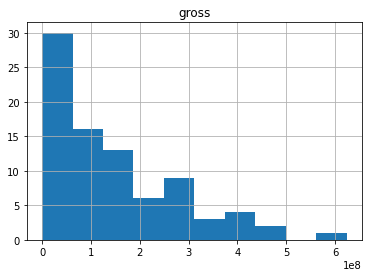

In [32]:
imbd2.hist(column= "gross")

In [33]:
6e8

600000000.0

In [34]:
imbd2[imbd2["gross"]>6e8] #a partir del grafic hem pogut veure el outlier

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


In [35]:
#hacemos lo mismo con el budget

In [36]:
imbd2[imbd2["budget"].isnull()]


,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Color,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
31,Color,Mike Leigh,150,3958500.0,Biography|Drama|History,Mr. Turner,2014,English,UK,NaN,6.8,"Lesley Manville,Ruth Sheen,Karl Johnson",0
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0


In [37]:
imbd2[imbd2["budget"].isnull()].shape #nomes hi han 4 nules

(4, 13)

In [38]:
imbd2["budget"].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93     True
94    False
95    False
96    False
Name: budget, Length: 91, dtype: bool

In [39]:
imbd2["budget"].describe()

count    8.700000e+01
mean     1.027289e+08
std      7.862689e+07
min      1.735000e+04
25%      4.000000e+07
50%      7.000000e+07
75%      1.740000e+08
max      2.500000e+08
Name: budget, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae12b7390>]],
      dtype=object)

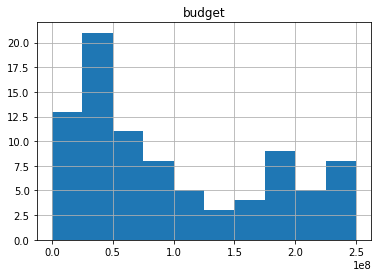

In [40]:
imbd2.hist(column="budget")

In [41]:
#vemos que no hay nada extraño..

In [42]:
#ahora miramos los generos (todo partiendo de la tabla incial de los valors nulos)

In [43]:
imbd2["genres"].value_counts()

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                       

In [44]:
#2 soluciones: 
#solución optima: que tenga una columna por cada genero. en vez de crear 5 columnas, gener

In [45]:
imbd2[imbd2["genres"].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
11,Color,Christopher Spencer,170,59696176.0,NaN,Son of God,2014,English,USA,22000000.0,5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000


In [46]:
imbd3= imbd2.copy()

In [47]:
imbd3["director_name"].fillna("sin director", inplace=True) #para todas las transformaciones es necesario poner el inplace3

In [48]:
imbd3

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [49]:
imbd3[imbd3["director_name"]=="sin director"]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,sin director,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
23,Color,sin director,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
30,Color,sin director,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
39,Color,sin director,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
54,NaN,sin director,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,Color,sin director,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
69,Color,sin director,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
73,Color,sin director,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
80,Color,sin director,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
82,Color,sin director,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [50]:
imbd3["genres"].fillna("sin genero", inplace=True)

In [51]:
media_gross= imbd3["gross"].mean()
media_gross

147788551.60714287

In [52]:
imbd3["gross"].fillna("media_gross", inplace=True)

In [53]:
median_budget= imbd3["budget"].median()

In [54]:
imbd3["budget"].fillna("median_budget", inplace=True)

In [55]:
imbd3.isnull().sum()

color                   11
director_name            0
duration                 0
gross                    0
genres                   0
movie_title              0
title_year               0
language                 0
country                  0
budget                   0
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [56]:
#sabemos que en la duracion no hay nulos, pero hacemos el hist

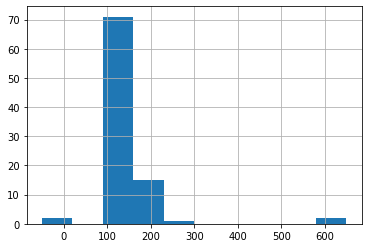

In [57]:
imbd3["duration"].hist()

In [58]:
#600 minutos es demasiado, y vemos cuales peliculas son

In [59]:
imbd3[imbd3["duration"]>600]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
32,Color,Gore Verbinski,650,89289910.0,Action|Adventure|Western,The Lone Ranger,2013,English,USA,215000000.0,6.5,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000


In [60]:
imbd3[imbd3["duration"]<0]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000


In [61]:
imbd3[(imbd3["duration"]<50) | (imbd3["duration"]>300)] #estos son los outliers

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
15,Color,Quentin Tarantino,580,162804648.0,Drama|Western,Django Unchained,2012,English,USA,100000000.0,8.5,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
32,Color,Gore Verbinski,650,89289910.0,Action|Adventure|Western,The Lone Ranger,2013,English,USA,215000000.0,6.5,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000
96,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [62]:
imbd3["duration"]= np.where(imbd3["duration"]<50, imbd3["duration"].mean(), imbd3["duration"])

In [63]:
imbd3["duration"]= np.where(imbd3["duration"]>300, imbd3["duration"].mean(), imbd3["duration"])

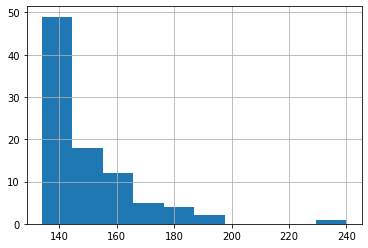

In [64]:
imbd3["duration"].hist() #estoy haciendo la media de los valores considerando los outliers, tendriamos que eliminar los outliners, si usamos una mediana no se consideraran los outliners

In [65]:
media_mejorada= imbd3[(imbd3["duration"]>50) & (imbd3["duration"]<300)]["duration"].mean() #hem de posar el corchete del ["duration"] 
media_mejorada

149.7033166085213

In [66]:
imbd3["duration"]= np.where(imbd3["duration"]>300, media_mejorada, imbd3["duration"])

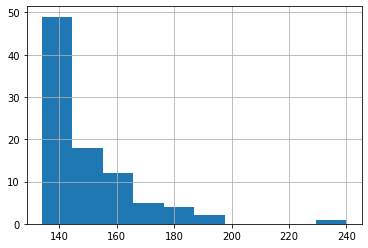

In [67]:
imbd3["duration"].hist()

¿Hay algún problema con el año de la película ("title_year")? *

In [68]:
imbd.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [69]:
imbd["title_year"].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Name: title_year, Length: 97, dtype: bool

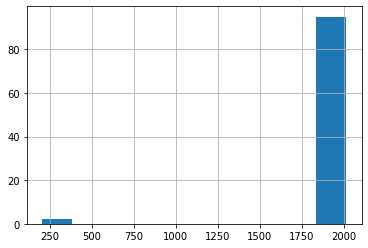

In [70]:
imbd["title_year"].hist()

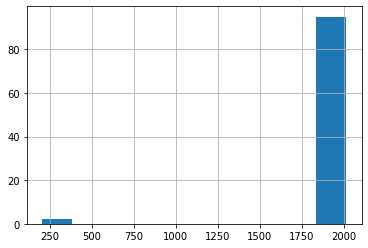

In [71]:
imbd["title_year"].hist()

In [72]:
imbd[imbd["title_year"]<500]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
79,Color,Daniel Espinosa,137,1206135.0,Crime|Drama|Thriller,Child 44,205,English,Czech Republic,50000000.0,6.4,"Tom Hardy,Fares Fares,Michael Nardone",18000


In [73]:
imbd2['title_year']= np.where(imbd2['title_year']<=1800,0,imbd2['title_year']) #Corrige la columna año de la película poniendo los valores de la columna a 0 aquellos que sean menores o igual a 1800

La columna "Language" ¿Cuántos valores diferentes tiene? *

In [74]:
imbd[imbd["language"].duplicated()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [75]:
imbd[imbd["language"].duplicated()].shape

(96, 13)

In [76]:
imbd["language"].shape

(97,)

Cuantos valores diferentes hay en la columna "language"

In [77]:
imbd[imbd['language'] == "English"].shape

(97, 13)

In [78]:
imbd[imbd['language'] == "English"].shape

(97, 13)

In [79]:
imbd[imbd['country'].duplicated()]  #per relacionar el pais amb el 'language'

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Color,Tony Gilroy,135,113165635.0,Action|Adventure|Thriller,The Bourne Legacy,2012,English,USA,125000000.0,6.7,"Jeremy Renner,Scott Glenn,Stacy Keach",31000
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


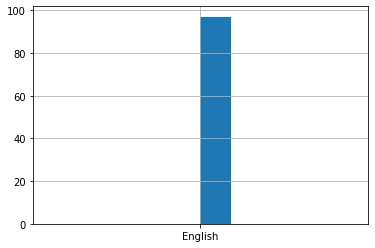

In [80]:
imbd['language'].hist() #aqui ens confirma la pregunta de quants idiomes hi han, nomes 1.

¿Cuántas películas fueron hechas (campo "country") en Estados Unidos (cuidado con los repetidos)?

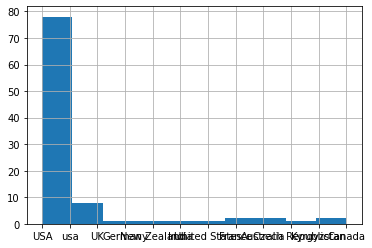

In [81]:
imbd['country'].hist() 

In [82]:
imbd4= imbd['country'].drop_duplicates()
imbd4

0                USA
3                usa
7                 UK
10           Germany
18       New Zealand
26             India
34     United States
45            France
52         Australia
79    Czech Republic
90        Kyrgyzstan
93            Canada
Name: country, dtype: object

In [83]:
imbd['country'].value_counts()

USA               75
UK                 8
usa                3
France             2
Australia          2
Germany            1
New Zealand        1
India              1
United States      1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [84]:
imbd[(imbd['country']=='USA') & (imbd['country']=='usa')].value_counts() #perque no em dona així? preguntar

Series([], dtype: int64)

¿Hay algún problema con el campo "imdb_score"? *

In [85]:
imbd.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


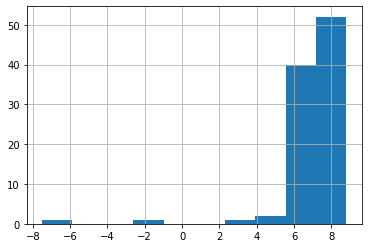

In [86]:
imbd["imdb_score"].hist()

In [87]:
imbd[imbd["imdb_score"]<0].shape #tenim dues files que tenen 2 valors negatius, el histograma ens ho mostra també

(2, 13)

In [88]:
imbd[imbd["imdb_score"]<0]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
10,NaN,Tom Tykwer,172,27098580.0,Drama|Sci-Fi,Cloud Atlas,2012,English,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000
83,Color,Angelina Jolie Pitt,137,115603980.0,Biography|Drama|Sport|War,Unbroken,2014,English,USA,65000000.0,-1.2,"Finn Wittrock,Jack O'Connell,Alex Russell",35000


In [89]:
#comprovem si existeix alguna nota superior a 10, que també seria imposible

imbd[imbd["imdb_score"]>10].shape #veiem que no

(0, 13)

¿Cuántas columnas extras de actores se crearán (sin considerar la original) ? 
1

In [90]:
imbd["actors"].value_counts() #dos columnas más, ya que el maxio es 3 (i la orginal no se cuenta)
     

Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    3
Aidan Turner,Adam Brown,James Nesbitt                   3
Morgan Freeman,Ayelet Zurer,Moises Arias                3
Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley        2
Albert Finney,Helen McCrory,Rory Kinnear                2
                                                       ..
Michael Emerson,Mark Valley,Grey Griffin                1
Jennifer Lawrence,Peter Dinklage,Hugh Jackman           1
Patrick Fugit,Sela Ward,Emily Ratajkowski               1
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 86, dtype: int64

¿Cuál es el nombre de película que tiene más de 250.000 likes en Facebook (campo movie_facebook_likes)? *

In [91]:
imbd[imbd['movie_facebook_likes']>250000]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
12,Color,Christopher Nolan,169,187991439.0,Adventure|Drama|Sci-Fi,Interstellar,2014,English,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000


In [92]:
imbd.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,97.000000,8.900000e+01,97.000000,9.300000e+01,97.000000,97.000000
mean,155.515464,1.539379e+08,1975.690722,1.049830e+08,6.871134,65273.453608
std,73.550452,1.412026e+08,258.477165,7.784829e+07,1.939231,58018.198425
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.000000,4.710508e+07,2012.000000,4.000000e+07,6.500000,24000.000000
50%,143.000000,1.156040e+08,2013.000000,7.800000e+07,7.200000,54000.000000
75%,154.000000,2.410639e+08,2014.000000,1.780000e+08,7.800000,85000.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000
